<h1>ALY6015_SpringA2020_Team#1</h1>

<p><b>Author:</b> Pragati Koladiya, Tanvi Bhagat, Munitha Priyanka</p>
<b>Purpose:</b><i> Hackathon#2</i>
<h1>Part 1</h1>

# Time Series Analysis

- Time series analysis is the collection of data at specific intervals over a period of time, with the purpose of identifying **trends, cycles, and seasonal** variances to aid in the forecasting of a future event. 

<b>Setup environment (libraries and packages)</b>

In [0]:
#Builds 'n Installs
#!pip install scipy==1.2
#!pip install -q --upgrade scipy;
#!pip install -q --upgrade quandl;
#!pip install -q --upgrade pandas-datareader;
#!pip install -q --upgrade statsmodels;

     |████████████████████████████████| 8.7MB 2.7MB/s 


Importing packages

In [0]:
from statsmodels.tsa.stattools import adfuller
import requests
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import io
import scipy
import quandl
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse

pd.options.display.float_format = '{:.2f}'.format
plt.rcParams["figure.figsize"] = (16,12)
plt.style.use('seaborn-white')

#PARAMETERS
#drive.mount('/content/drive')
start_date = "1994-01-01"
#end_date = ""
end_date = "2020-01-01"
if end_date == "":
  end_date = datetime.datetime.now()

import matplotlib.dates as mdates

def shade_recessions():
  if start_date < "2007-01-01":
    ax.axvspan("2007-12", "2009-06", alpha=0.6, color='gray') #Great Recession ("Financial Crisis")
  if start_date < "2001-01-01":
    ax.axvspan("2001-03", "2001-11", alpha=0.6, color='gray') #Early 2000's Recession ("Dot Com Bubble")
  if start_date < "1990-01-01":
    ax.axvspan("1990-07", "1991-03", alpha=0.7, color='gray') #Early 1990's Recession ("Oil Price Shock")
  if start_date < "1981-01-01":
    ax.axvspan("1981-07", "1982-11", alpha=0.6, color='gray') #Early 1980's Recession ("Reagan")
   
def plot_grid():
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)

# Load Dataset
<i>Time Series Values Only</i>

In [0]:
#load the dataset
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQQiC_bV-RJZ9XUVL4UIssyiQ0SP2W2-HgogWYLY5JVo-RbMwVng1poC2pZIpYpqIl39QI2PtpTR3VR/pub?gid=505038215&single=true&output=csv"

fopen = requests.get(data_path).content
ds_raw=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header= 0 )
ds_raw.head()


,Period,Value
0,Q1 '07,1.66
1,Q2 '07,1.59
2,Q3 '07,1.79
3,Q4 '07,3.12
4,Q1 '08,2.28


In [0]:
ds_raw.dtypes

Period     object
Value     float64
dtype: object

<i>Add date as index</i>

In [0]:
ds = ds_raw.copy()
date=pd.date_range("2007-03-01", "2018-01-01", freq="3M")
print(date)
ds1=pd.DataFrame(date, columns= ['Date'])
#ds['Date']=ds1
ds = ds.join(ds1)
ds = ds.drop(columns = ['Period'])

ds.head()

DatetimeIndex(['2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='3M')


,Value,Date
0,1.66,2007-03-31
1,1.59,2007-06-30
2,1.79,2007-09-30
3,3.12,2007-12-31
4,2.28,2008-03-31


In [0]:
ds = ds.set_index('Date')
ds.head()

,Value
Date,
2007-03-31,1.66
2007-06-30,1.59
2007-09-30,1.79
2007-12-31,3.12
2008-03-31,2.28


<h3>Converting values into log</h3>
<p><i>- The reason to use logarithmic scales in charts and graphs is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.</i></p>


In [0]:
y = np.log(ds['Value'])
y_value = ds['Value']
y.head(5)

Date
2007-03-31   0.51
2007-06-30   0.46
2007-09-30   0.58
2007-12-31   1.14
2008-03-31   0.82
Name: Value, dtype: float64

- <i>Inverse log</i>

In [0]:
#use this to take inverse log
np.exp(0.51)

1.6652911949458864

- <i>Checking null values</i>

In [0]:
y.isnull().sum()

0

- <i>Graphical representaion of number of years vs values</i>

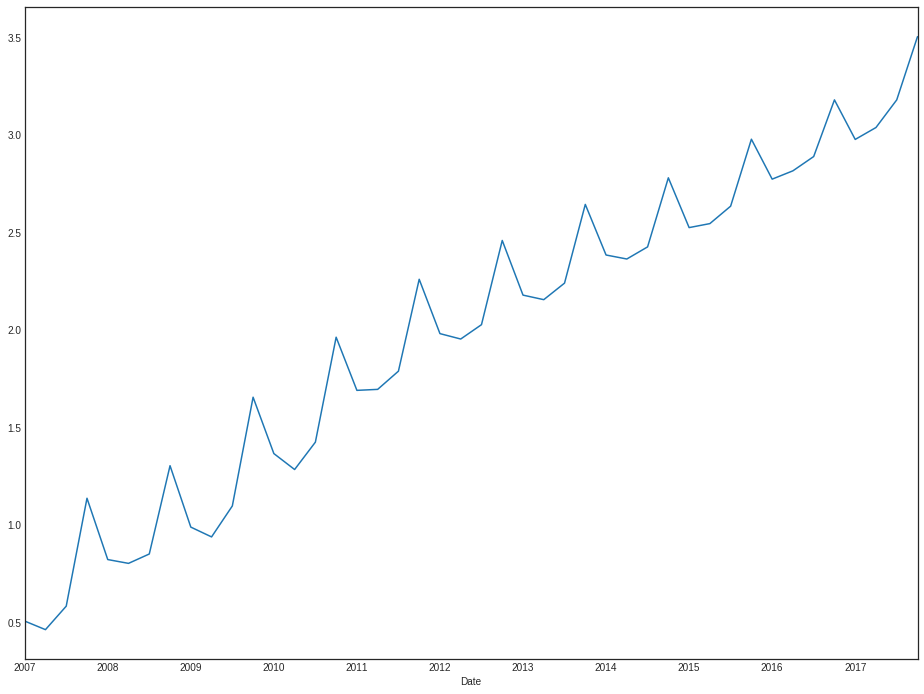

In [0]:
y.plot()

<h3>Visulizing the data using additive model</h3>

- <i>Since our data has less fluctuations over the years, we have used additive model</i>
- <i>Additive model is used when the variance of the time series doesn't change over different values of the time series.</i>

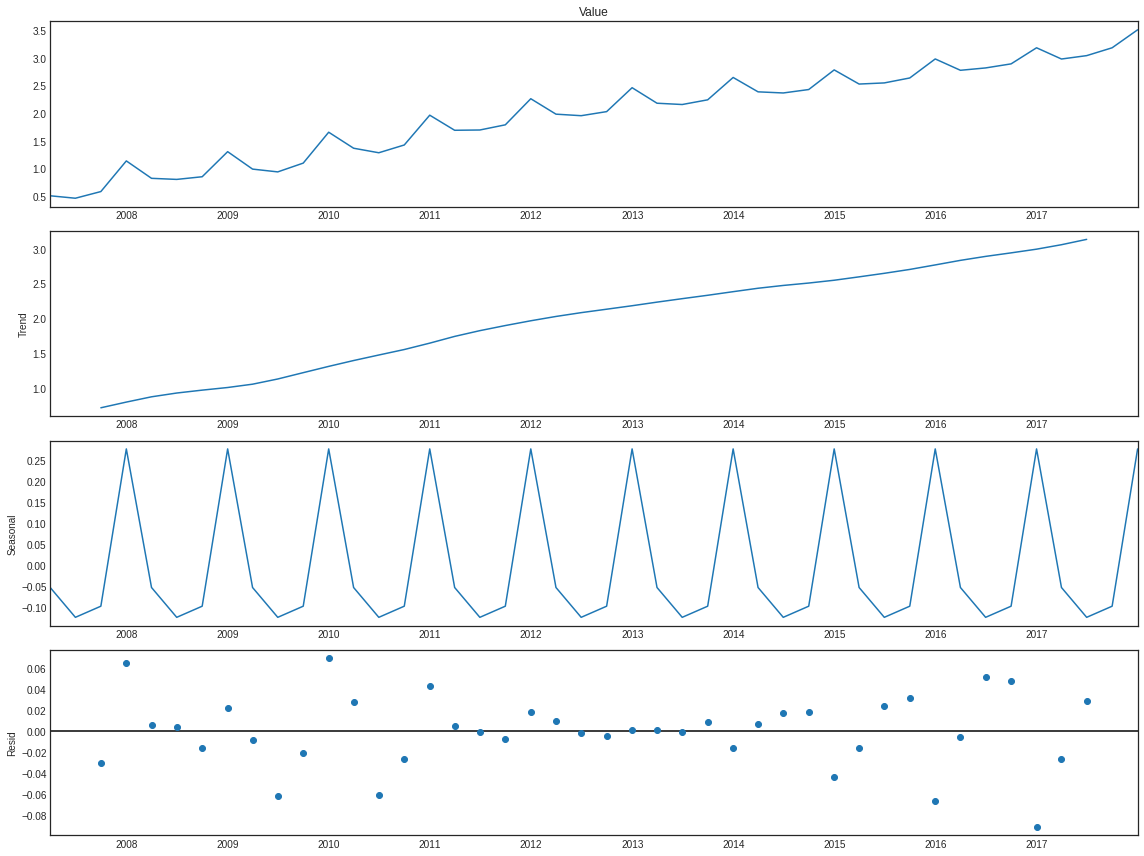

In [0]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

<h3>ARIMA Time Series Model:
<i>Auto</i>
<i>Regressive</i>
<i>Integrated</i>
<i>Moving</i>
<i>Average</i>
<ul>
<li>p is the auto-regressive part of the model.</li>
<li>d is the integrated part of the model.</li>
<li>q is the moving average part of the model.</li>
</ul>

In [0]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print(pdq)
print(seasonal_pdq)


[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 4), (0, 0, 1, 4), (0, 1, 0, 4), (0, 1, 1, 4), (1, 0, 0, 4), (1, 0, 1, 4), (1, 1, 0, 4), (1, 1, 1, 4)]


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
model_output = pd.DataFrame(columns = ['parameters', 'results.aic'])

a = "bob"
b = "bob"
c = 1.0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #Only for diagnostic measures
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,
                                                  #param_seasonal, results.aic))
            a = param
            b = param_seasonal
            c = results.aic
            model_output = model_output.append({'parameters': 'ARIMA{}x{}4'.format(a, b),
                                                'results.aic': c}, ignore_index = True)
        except:
            continue

In [0]:
model_output

,parameters,results.aic
0,"ARIMA(0, 0, 0)x(0, 0, 0, 4)4",190.62
1,"ARIMA(0, 0, 0)x(0, 0, 1, 4)4",178.70
2,"ARIMA(0, 0, 0)x(0, 1, 0, 4)4",7.16
3,"ARIMA(0, 0, 0)x(0, 1, 1, 4)4",-22.82
4,"ARIMA(0, 0, 0)x(1, 0, 0, 4)4",-42.00
...,...,...
59,"ARIMA(1, 1, 1)x(0, 1, 1, 4)4",-121.86
60,"ARIMA(1, 1, 1)x(1, 0, 0, 4)4",-129.15
61,"ARIMA(1, 1, 1)x(1, 0, 1, 4)4",-132.59
62,"ARIMA(1, 1, 1)x(1, 1, 0, 4)4",-116.15


In [0]:
model_output.describe()

,results.aic
count,64.00
mean,-72.55
std,79.54
min,-139.33
25%,-126.00
50%,-116.84
75%,-28.81
max,190.62


In [0]:
model_output[28:29]

,parameters,results.aic
28,"ARIMA(0, 1, 1)x(1, 0, 0, 4)4",-139.33


In [0]:
#Fit the model with the lowest AIC above

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5486      0.126      4.341      0.000       0.301       0.796
ar.S.L4        0.9460      0.026     36.430      0.000       0.895       0.997
sigma2         0.0014      0.000      6.504      0.000       0.001       0.002


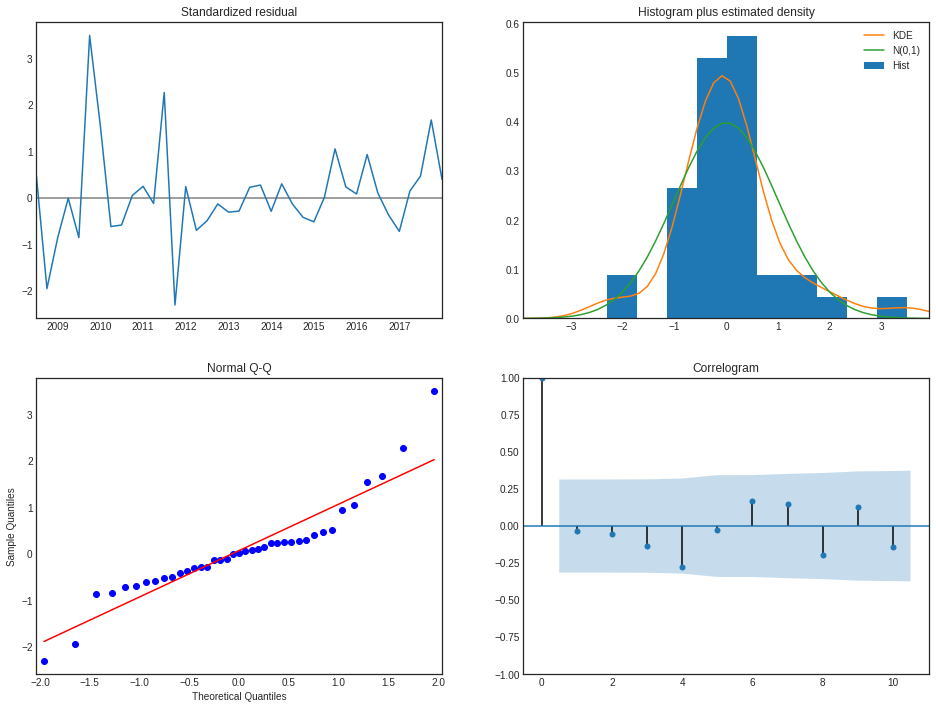

In [0]:
#Top left: Gaussian Noise
#Top right: KDE closely follows a normal distribution with a mean of 0 and an SD of 1-----N(0,1)
#Bottom left: Normal-looking Q-Q plot (i.e., data points follow the red line)
#Bottom right:

results.plot_diagnostics()
plt.show()


- <i>Validation - Not dynamic</i>

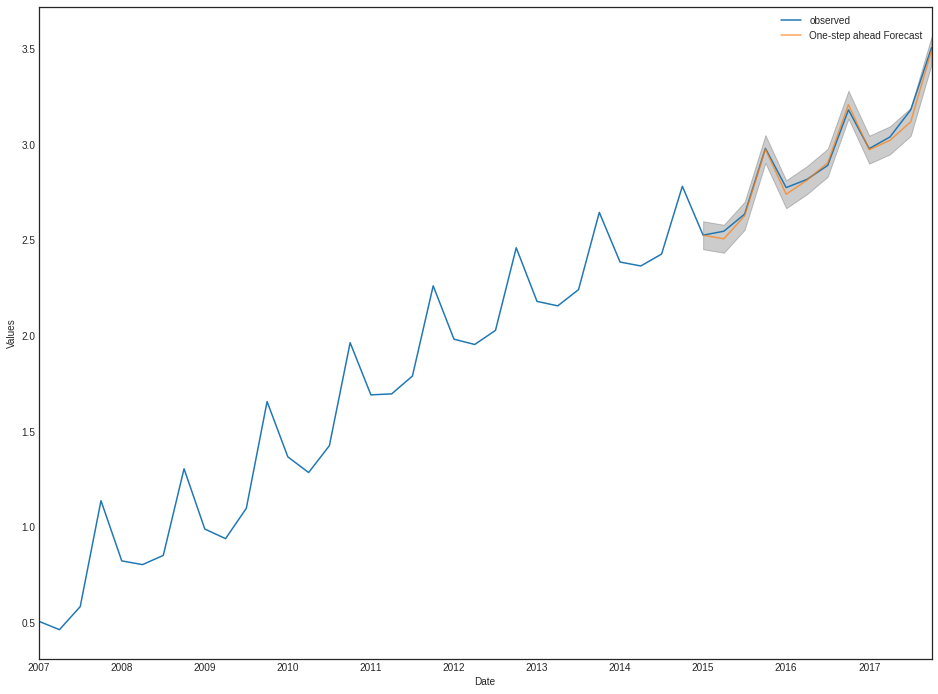

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2015-03-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2007':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()

- <i>Performance Criteria to compute MSE</i>

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-03-31':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


**1. Predict the values for the next 8 time periods (with confidence intervals)**

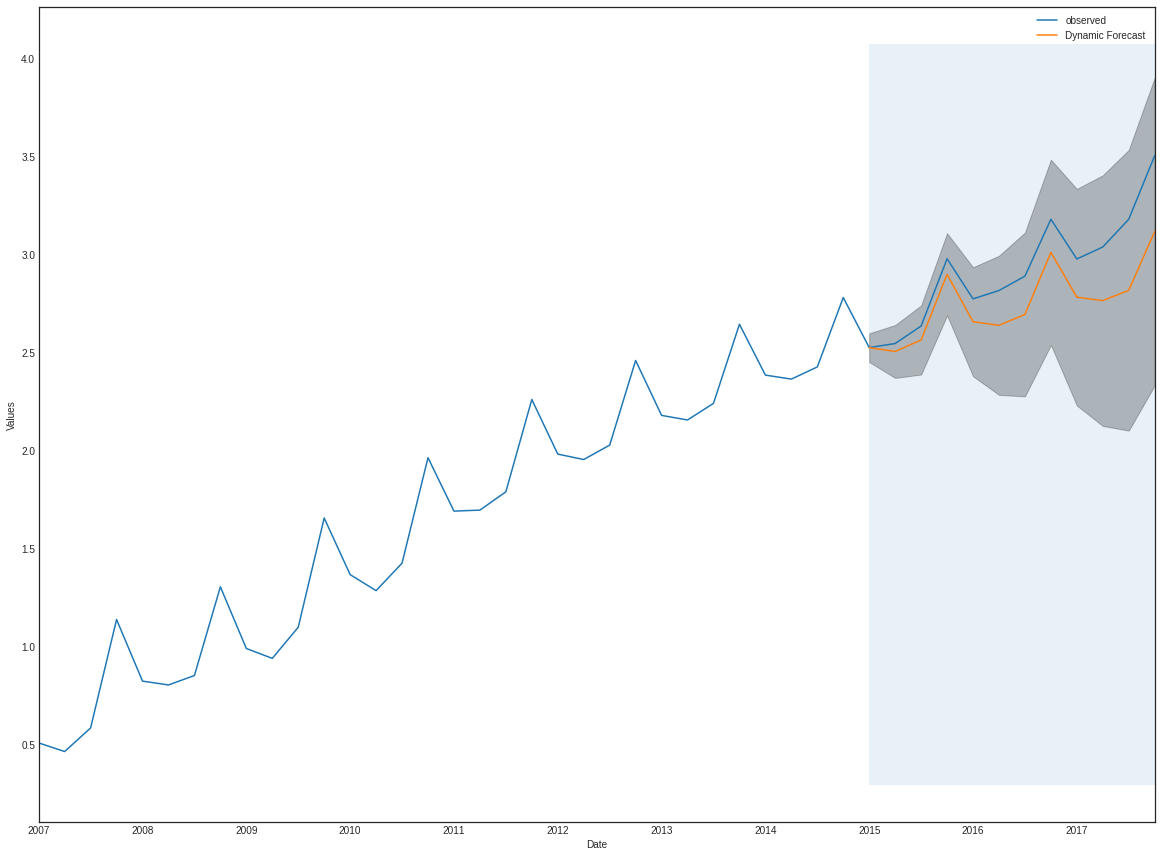

In [0]:
#Validation using dynamic forecast
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-03-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2007':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-03-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Values')

plt.legend()

In [0]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2015-03-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.04


- **Preparing for a forecast**

In [0]:
# Get forecast 8 steps ahead in future
pred_uc = results.get_forecast(steps=8)
pred_uc_values = np.exp(pred_uc.predicted_mean)


# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
pred_ci_values = np.exp(pred_ci)

print('############ \n confidence interval log values')
print(pred_ci)

# converting back to values
pred_ci_values =  np.exp(pred_ci)
print('############ \n   confidence interval values')
print(pred_ci_values)

############ 
 confidence interval log values
            lower Value  upper Value
2018-03-31         3.25         3.39
2018-06-30         3.24         3.51
2018-09-30         3.34         3.69
2018-12-31         3.61         4.03
2019-03-31         3.37         3.92
2019-06-30         3.35         4.06
2019-09-30         3.41         4.25
2019-12-31         3.65         4.59
############ 
   confidence interval values
            lower Value  upper Value
2018-03-31        25.74        29.80
2018-06-30        25.64        33.58
2018-09-30        28.13        40.02
2018-12-31        36.98        56.24
2019-03-31        29.02        50.62
2019-06-30        28.39        57.74
2019-09-30        30.26        69.81
2019-12-31        38.29        98.57


**2. Make 3 observations about the data**
- <i>2018-03-31    <b> Lower Bound:</b>   25.74      <b> Upper Bound:</b> 29.80  <b>Mean:</b> 27.69</i>

- <i>2019-03-31    <b> Lower Bound:</b>  29.02      <b> Upper Bound:</b>50.62  <b>Mean:</b> 38.33</i>

- <i>2019-12-31    <b> Lower Bound:</b>  38.29      <b> Upper Bound:</b> 29.80  <b>Mean:</b> 98.57</i>


In [0]:
print('############ \n mean  log values')
print(pred_uc.predicted_mean)

print('############ \n   mean values')
print(pred_uc_values)

############ 
 mean  log values
2018-03-31   3.32
2018-06-30   3.38
2018-09-30   3.51
2018-12-31   3.82
2019-03-31   3.65
2019-06-30   3.70
2019-09-30   3.83
2019-12-31   4.12
Freq: Q-DEC, dtype: float64
############ 
   mean values
2018-03-31   27.69
2018-06-30   29.34
2018-09-30   33.55
2018-12-31   45.60
2019-03-31   38.33
2019-06-30   40.48
2019-09-30   45.96
2019-12-31   61.44
Freq: Q-DEC, dtype: float64


- <i>Graphical representaion for predicted mean plot </i>

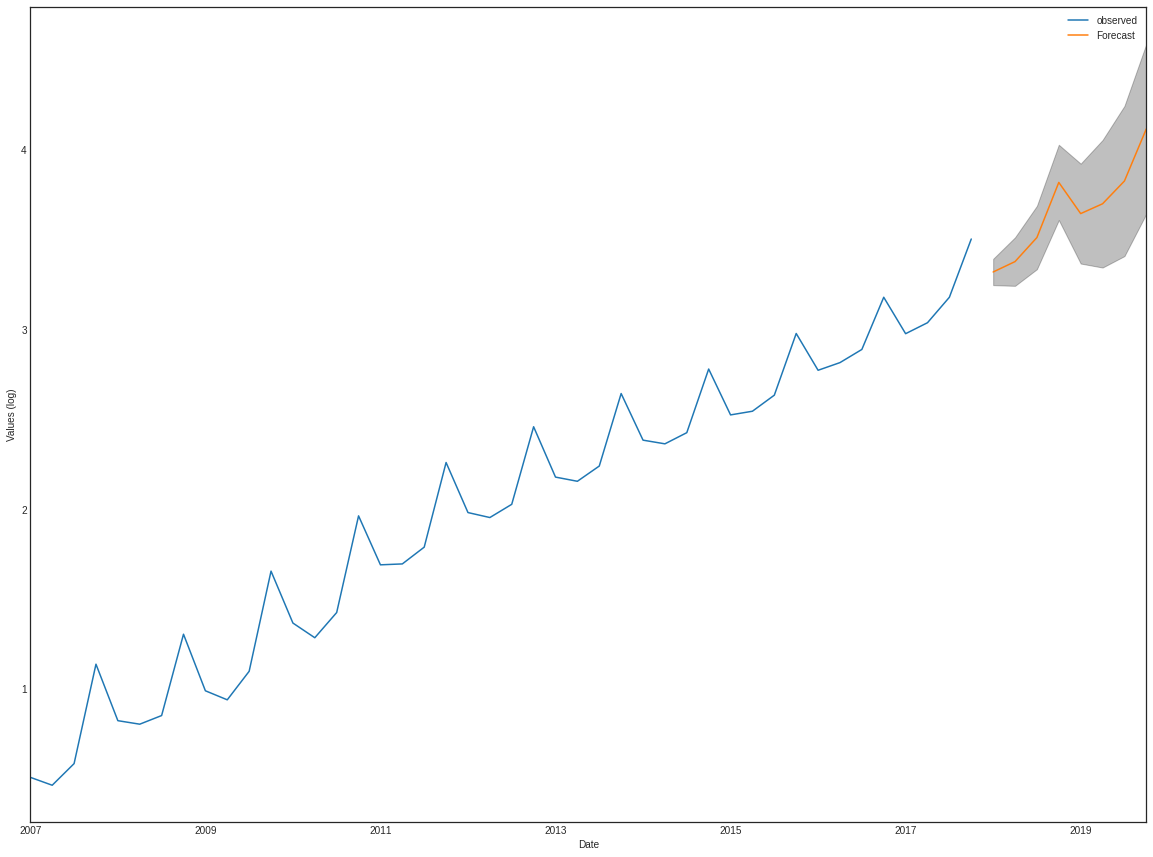

In [0]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Values (log)')

plt.legend()

- <i>Graphical representaion of predicted values plot</i>

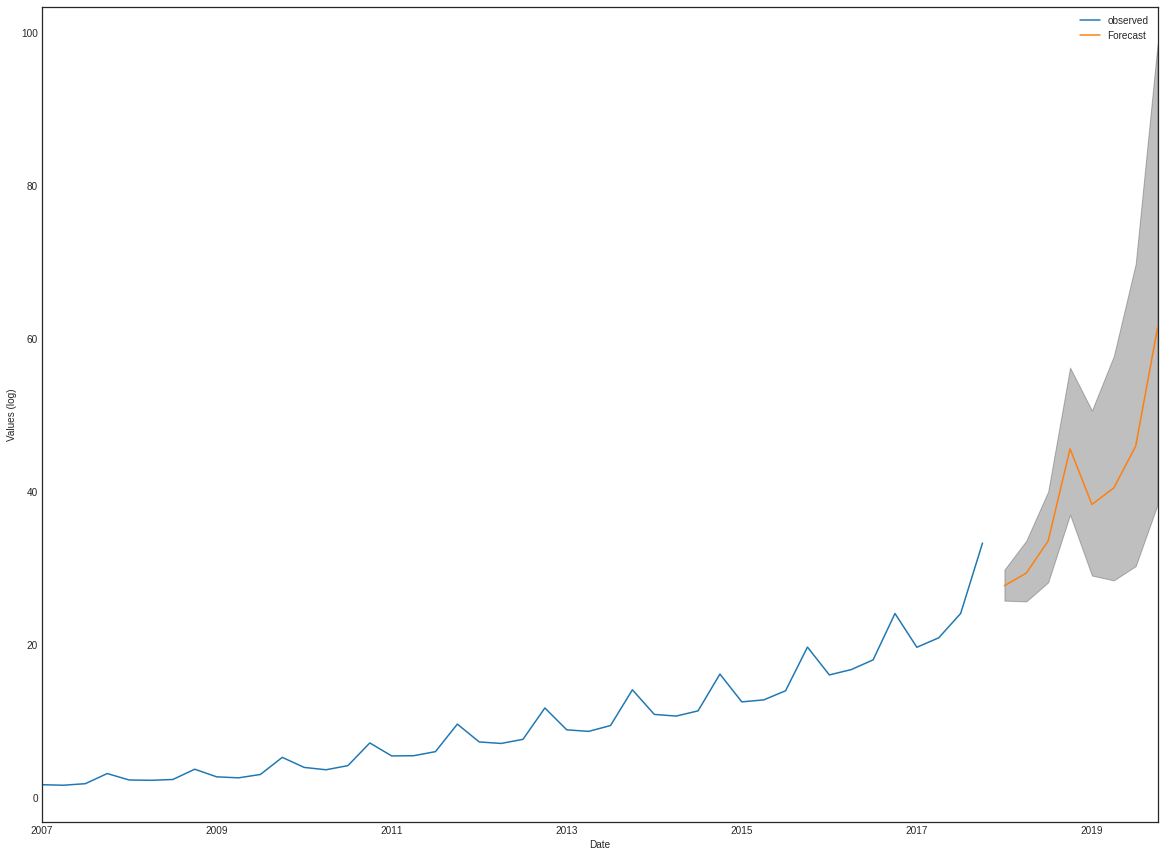

In [0]:
ax = y_value.plot(label='observed', figsize=(20, 15))
pred_uc_values.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_values.index,
                pred_ci_values.iloc[:, 0],
                pred_ci_values.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Values (log)')

plt.legend()

<h2><b>Conclusion:</b></h2>

- <p>As the mean square error of our forecasts is 0.0, we believe that above predictions are correct.</p>